# Exploratory Data Analysis for Diabetes
### Ri-on Kim
### April 28, 2024

Diabetes remains one of the most prevalent chronic diseases worldwide, posing significant public health challenges and burdening healthcare systems. The increasing incidence of diabetes underscores the necessity for comprehensive research into its correlations with various health indicators. This project aims to delve into the complexities of diabetes by analyzing data from Kaggle(https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv) focusing specifically on its correlations with other variables.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
plt.style.use('ggplot')


Let's import the dataset first.

In [5]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

To understand the data, let's look into some rows

In [7]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


- The 'Diabetes_012' column indicates a degree of diabetes. 0 means no diabetes, 1 means prediabetes and 2 means diabetes.
- Age consists of 13-level age category. 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44,
    6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79 13 = 80-.  
- Education level consists of 6 level. 1 = Never attended school, 2 = Kinderarten, 3 = Elementary School, 4 = Middle School, 5 = High School, 6 = Çollege.
- Income consists of 8 scales. 1 = less than 10,000, 5 = less than 35,000, and 8 = more than 75,000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

We can check there are no null values

In [11]:
df[df.duplicated()].shape

(23899, 22)

However, there are some duplicated rows. To prevent confusion, I will drop the duplicated rows.

In [13]:
df = df.drop_duplicates()
df.count()

Diabetes_012            229781
HighBP                  229781
HighChol                229781
CholCheck               229781
BMI                     229781
Smoker                  229781
Stroke                  229781
HeartDiseaseorAttack    229781
PhysActivity            229781
Fruits                  229781
Veggies                 229781
HvyAlcoholConsump       229781
AnyHealthcare           229781
NoDocbcCost             229781
GenHlth                 229781
MentHlth                229781
PhysHlth                229781
DiffWalk                229781
Sex                     229781
Age                     229781
Education               229781
Income                  229781
dtype: int64

After dropping the duplicated rows, there are 229,781 values

 normal: 190055
 prediabetes: 4629
 diabetes: 35097


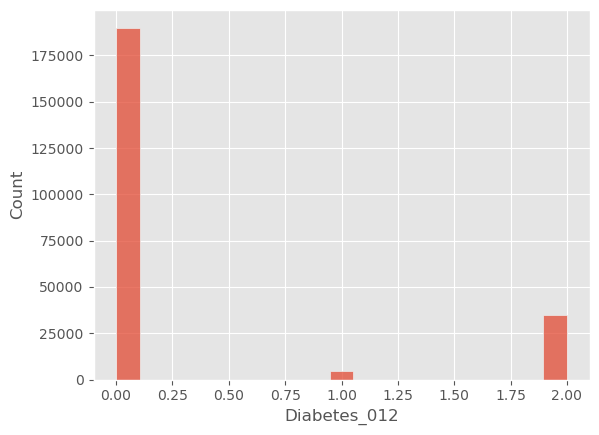

In [15]:
warnings.filterwarnings('ignore')

sns.histplot(df, x = 'Diabetes_012', stat = 'count');
normal_count = df['Diabetes_012'].value_counts()[0]
prediabetes_count = df['Diabetes_012'].value_counts()[1]
diabetes_count = df['Diabetes_012'].value_counts()[2]
print(f' normal: {normal_count}\n prediabetes: {prediabetes_count}\n diabetes: {diabetes_count}')

We can check how many diabets and prediabets are exist in our dataset.
    There are 190,055 normal people, 4629 prediabetes people, and 35097 diabetes people.
    Therefore, approximately 18.46% of people in the data set is diabetes.

Using the correlation matrix, we can get an overall insight into correlations in this data.

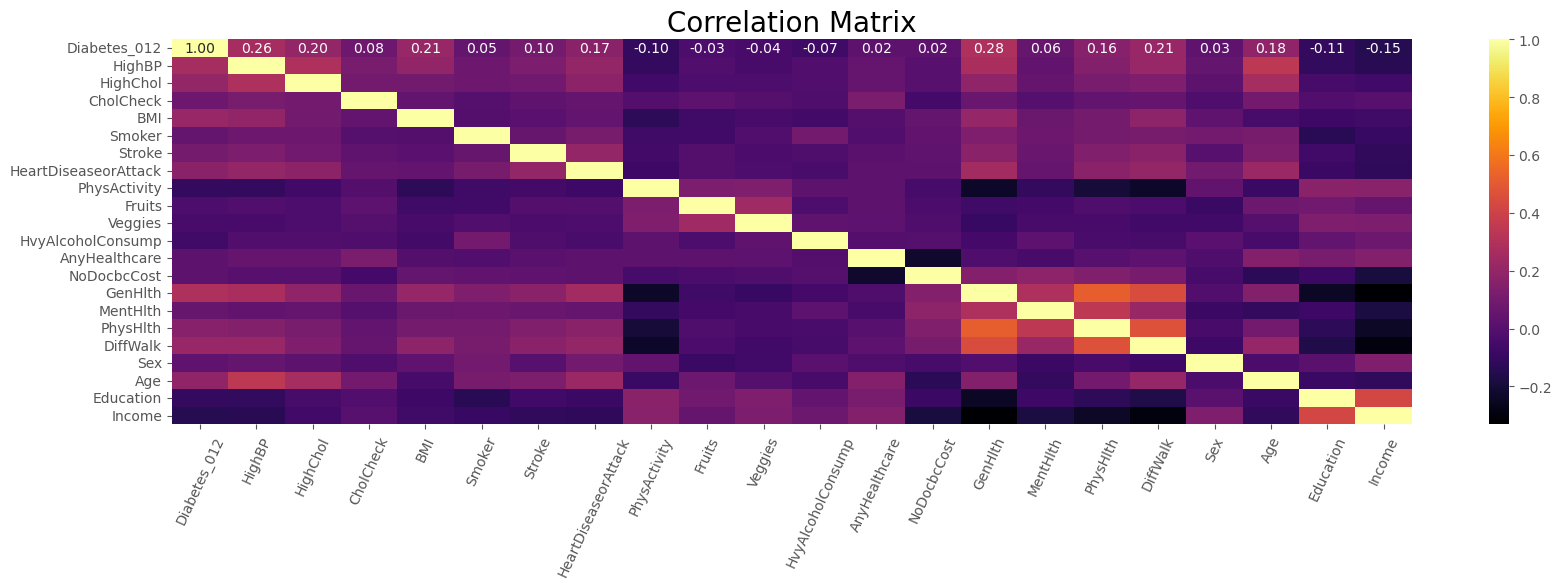

In [18]:
f,ax = plt.subplots(figsize=[20, 5])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='inferno')
ax.set_title("Correlation Matrix", fontsize=20)
plt.xticks(rotation = 65)
plt.show()

In this correlation matrix, the most important thing we need to focus on is the first row.
The first row gives us how each variables are related to diabetes.

This allows us the following assumptions.
- BP, Cholesterol, BMI, Heart Disease or Attack, Stroke, General Health, difficulty walking, Physical Health, and Age are highly positively related to diabetes.
    This means If these variables are high, the probability of getting diabetes is extremely high.
- Cholesterol check, smoking, Taking Fruits, Taking Veggies, Heavy alcohol consumption, Healthcare Coverage, No Doctor Cost, Mental Health, and Sex are relatively not related to diabetes.
- Physical Activity, Education, Income is negatively related to diabetes
    This means High Physical Activity, Education, and Income bring out a high probability of not getting diabetes.
    
There are some correlations we can easily assume and also some correlations we cannot assume easily. For example, BMI is obvious to have strong correlation with diabetes. I will drop some variables that seem to have easily assumed correlations.

In [20]:
df = df.drop(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Sex', 'NoDocbcCost', 'Stroke', 
         'HeartDiseaseorAttack', 'Fruits', 'GenHlth', 'DiffWalk', 'HvyAlcoholConsump',
         'AnyHealthcare'], axis = 1)
df

,Diabetes_012,Smoker,PhysActivity,Veggies,MentHlth,PhysHlth,Age,Education,Income
0,0.0,1.0,0.0,1.0,18.0,15.0,9.0,4.0,3.0
1,0.0,1.0,1.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,0.0,0.0,0.0,30.0,30.0,9.0,4.0,8.0
3,0.0,0.0,1.0,1.0,0.0,0.0,11.0,3.0,6.0
4,0.0,0.0,1.0,1.0,3.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...
253675,0.0,0.0,0.0,1.0,0.0,5.0,5.0,6.0,7.0
253676,2.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,0.0,0.0,1.0,0.0,0.0,7.0,5.0,1.0


I divided the data set into three pieces to compare normal, prediabetes, and diabetes people and then plot it to check the correlation more detaily.

In [22]:
df0 = df[df['Diabetes_012'] == 0.0]
df1 = df[df['Diabetes_012'] == 1.0]
df2 = df[df['Diabetes_012'] == 2.0]

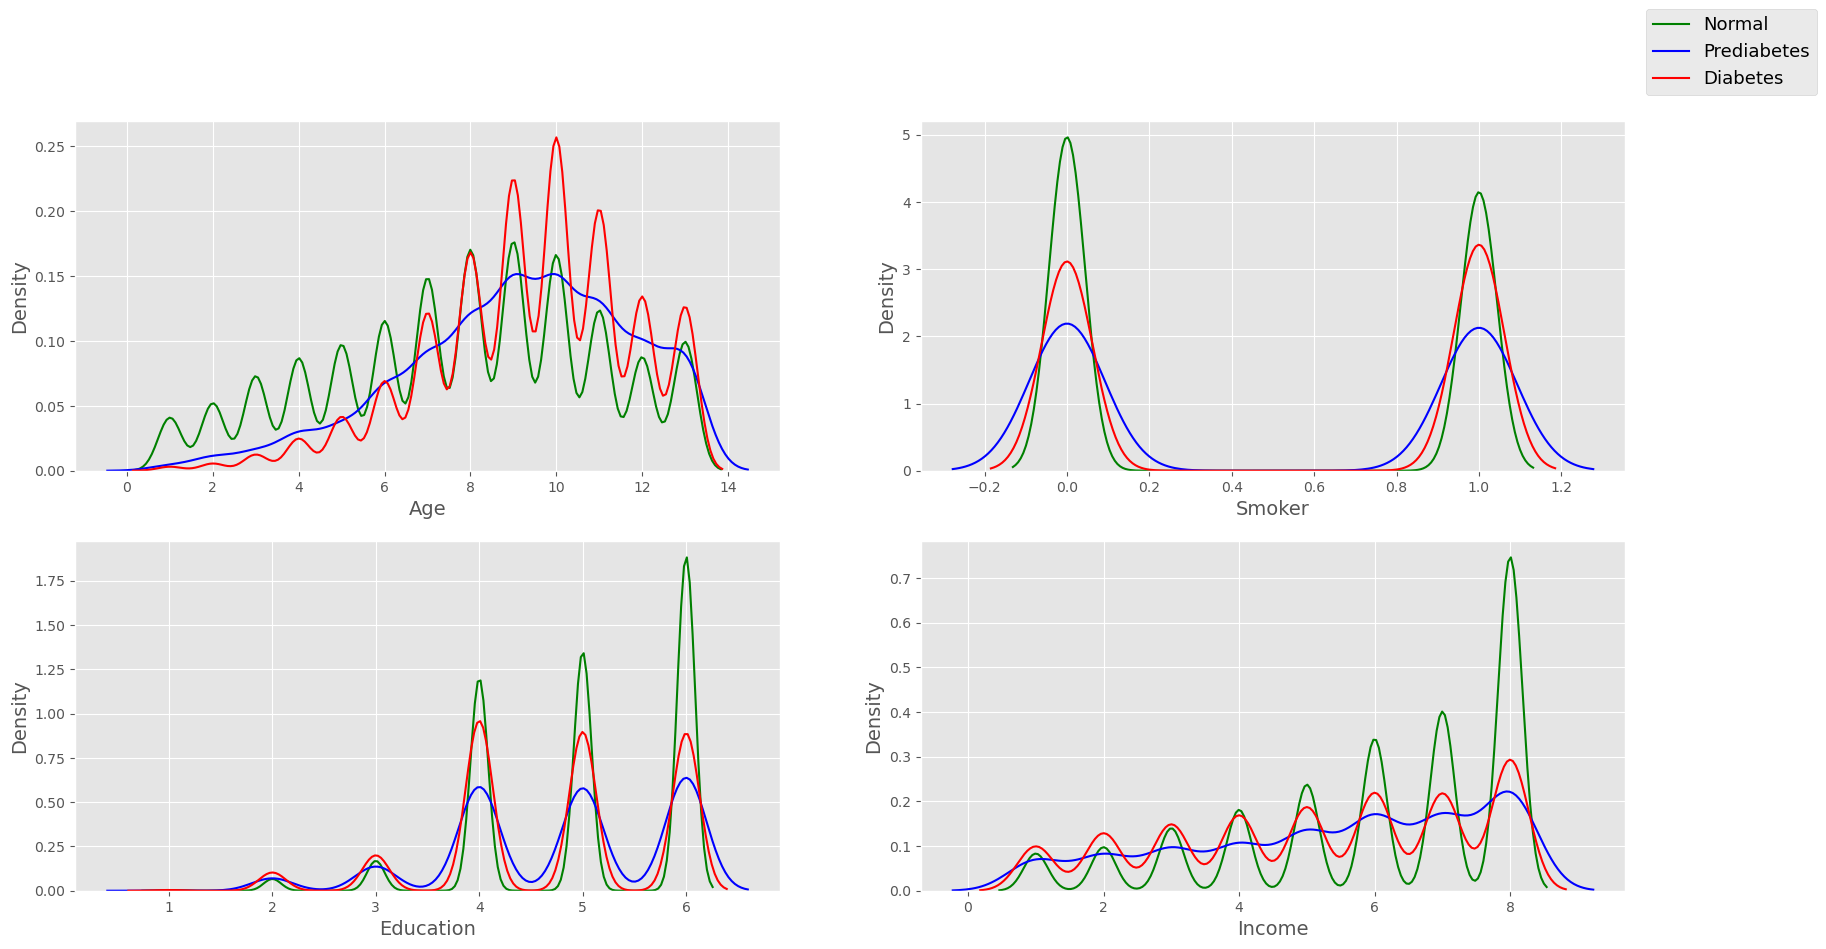

In [23]:
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 2, figsize = (20, 10))

sns.kdeplot(df0['Age'], ax=ax[0][0], color='green')
sns.kdeplot(df1['Age'], ax=ax[0][0], color='blue')
sns.kdeplot(df2['Age'], ax=ax[0][0], color='red')
ax[0][0].set_xlabel('Age', fontsize=14)
ax[0][0].set_ylabel('Density', fontsize=14)
fig.legend(labels = ['Normal', 'Prediabetes', 'Diabetes'], fontsize = 13)

sns.kdeplot(df0['Smoker'], ax=ax[0][1], color='green')
sns.kdeplot(df1['Smoker'], ax=ax[0][1], color='blue')
sns.kdeplot(df2['Smoker'], ax=ax[0][1], color='red')
ax[0][1].set_xlabel('Smoker', fontsize=14)
ax[0][1].set_ylabel('Density', fontsize=14)

sns.kdeplot(df0['Education'], ax=ax[1][0], color='green')
sns.kdeplot(df1['Education'], ax=ax[1][0], color='blue')
sns.kdeplot(df2['Education'], ax=ax[1][0], color='red')
ax[1][0].set_xlabel('Education', fontsize=14)
ax[1][0].set_ylabel('Density', fontsize=14)

sns.kdeplot(df0['Income'], ax=ax[1][1], color='green')
sns.kdeplot(df1['Income'], ax=ax[1][1], color='blue')
sns.kdeplot(df2['Income'], ax=ax[1][1], color='red')
ax[1][1].set_xlabel('Income', fontsize=14)
ax[1][1].set_ylabel('Density', fontsize=14)


plt.show()

By plotting the density curve, We can find a more detailed relationship between Diabetes and each variable.
- Age: When the age level is 8(Age 55 ~ 59), the number of people who have diabetes exceeds the number of people who do not have diabetes.
    Also, The gap between diabetes and normal is biggest when the age level is 10(65 ~ 69).
- Smoking: Although there is a slight difference between non-smokers and smokers, the diabetes graph is quite similar. 
    We can assume that there is no significant correlation between smoking and diabetes.
- Education: This is one of the most interesting outcomes. When the education level is getting higher, the ratio of diabetes is getting lower.
    When the education level is 4(Middle School), the number of people who are normal is greater than the number of people who are diabetes.
    Also, The gap between normal and diabetes is changed significantly when the education level is changed from 5(High School) to 6(College).
- Income: When Income level is 5(35k), The percentage of normal people exceed diabetes people. When Income level is 8(more than 75k), 
    the number of normal people is much bigger than the number of diabetes people.

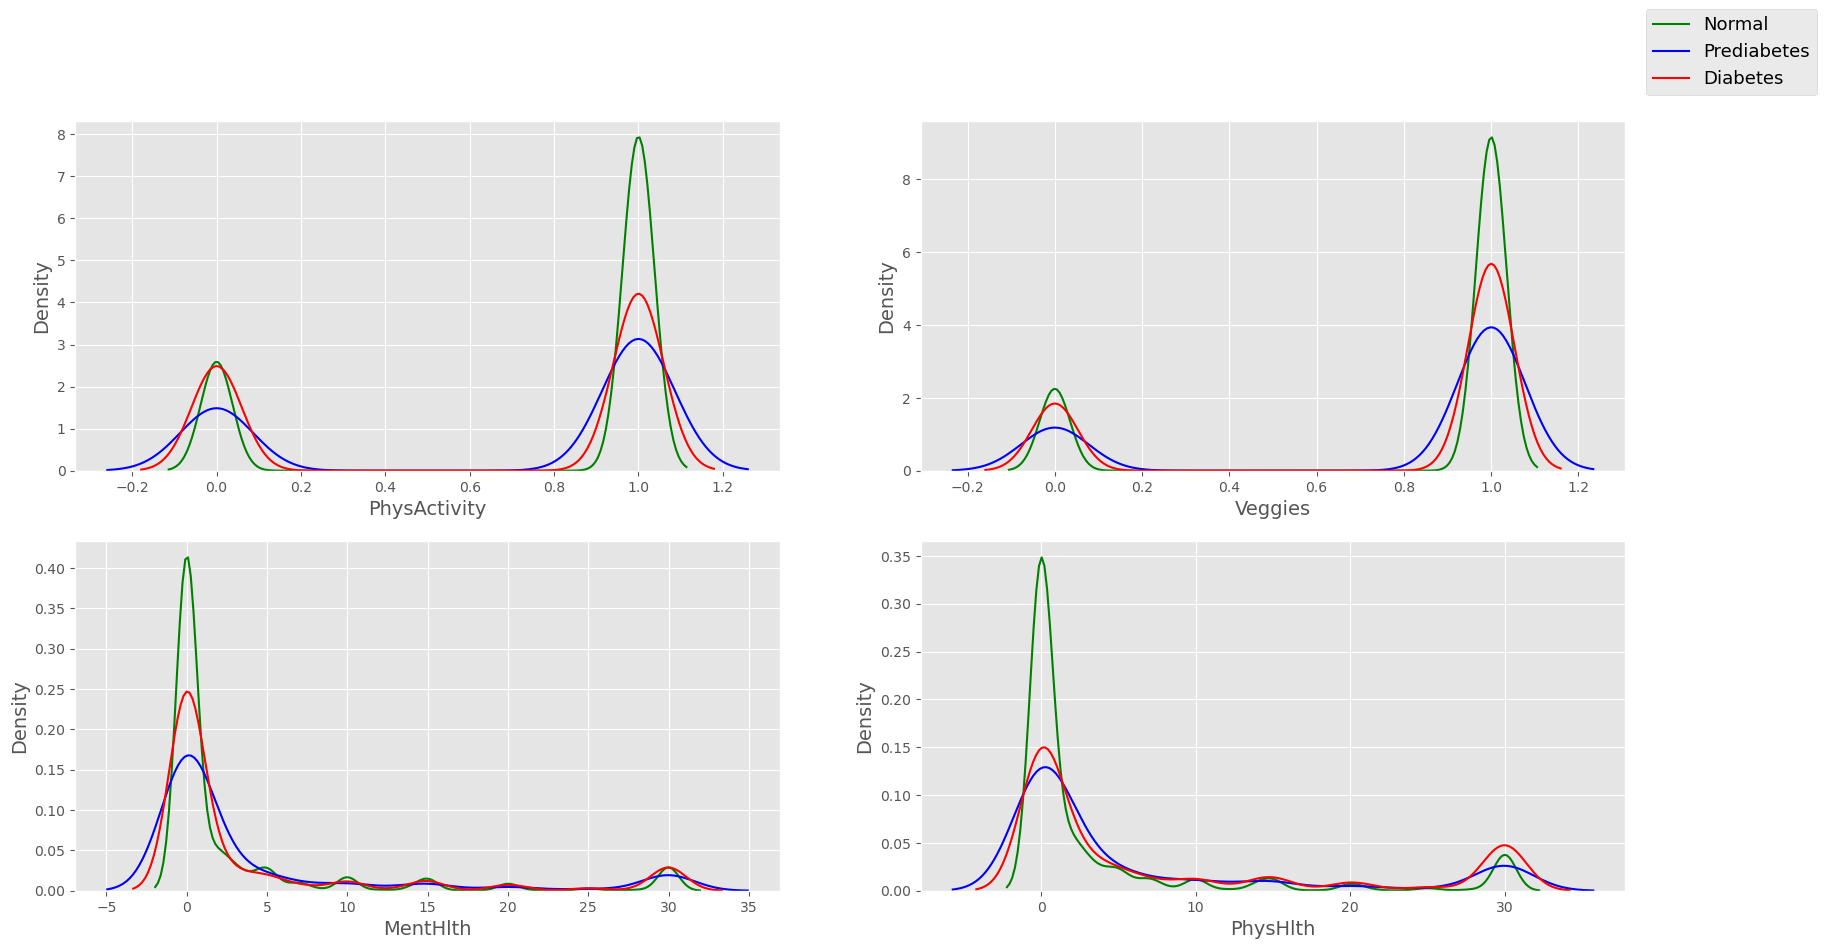

In [25]:
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 2, figsize = (20, 10))

sns.kdeplot(df0['PhysActivity'], ax=ax[0][0], color='green')
sns.kdeplot(df1['PhysActivity'], ax=ax[0][0], color='blue')
sns.kdeplot(df2['PhysActivity'], ax=ax[0][0], color='red')
ax[0][0].set_xlabel('PhysActivity', fontsize=14)
ax[0][0].set_ylabel('Density', fontsize=14)
fig.legend(labels = ['Normal', 'Prediabetes', 'Diabetes'], fontsize = 13)

sns.kdeplot(df0['Veggies'], ax=ax[0][1], color='green')
sns.kdeplot(df1['Veggies'], ax=ax[0][1], color='blue')
sns.kdeplot(df2['Veggies'], ax=ax[0][1], color='red')
ax[0][1].set_xlabel('Veggies', fontsize=14)
ax[0][1].set_ylabel('Density', fontsize=14)

sns.kdeplot(df0['MentHlth'], ax=ax[1][0], color='green')
sns.kdeplot(df1['MentHlth'], ax=ax[1][0], color='blue')
sns.kdeplot(df2['MentHlth'], ax=ax[1][0], color='red')
ax[1][0].set_xlabel('MentHlth', fontsize=14)
ax[1][0].set_ylabel('Density', fontsize=14)

sns.kdeplot(df0['PhysHlth'], ax=ax[1][1], color='green')
sns.kdeplot(df1['PhysHlth'], ax=ax[1][1], color='blue')
sns.kdeplot(df2['PhysHlth'], ax=ax[1][1], color='red')
ax[1][1].set_xlabel('PhysHlth', fontsize=14)
ax[1][1].set_ylabel('Density', fontsize=14)

plt.show()

- PhysActivity: Obviously, those who are doing physical activity have a low ratio of diabetes.
- Veggies: Although people who are taking veggies have a high ratio of normal people, It seems there are no significant differences.
- Mental Health & Physical Health: The two graphs look quite similar but we can assume that physical health is more related to diabetes.

## Conclusion

- Based on the analysis, We can conclude that age, education, income, physical activity, and Physical health are considerably related to diabetes.
    Of course, BMI, Cholesterol, and so on are highly related to diabetes.
- However, taking veggies, fruits, and alcohol does not impact the diabetes significantly.
    Also, healthcare coverage, mental health, and no doctor cost are relatively not correlated with diabetes.
- Therefore, I can conclude that working out is more important than taking which foods and interest in healthcare to prevent diabetes. Especially when your age is more than 55, preventing diabetes through physical activity is necessary for your health.